In [ ]:
#Description: This program uses the dual moving average crossover to determine when to buy and sell stock 

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#Load data
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
#Store the data
AAPL = pd.read_csv('AAPL.csv')
#Show the data
AAPL

,Date,Open,High,Low,Close,Adj Close Price,Volume
0,1/2/2015,27.847500,27.860001,26.837500,27.332500,24.941502,212818400
1,1/5/2015,27.072500,27.162500,26.352501,26.562500,24.238857,257142000
2,1/6/2015,26.635000,26.857500,26.157499,26.565001,24.241146,263188400
3,1/7/2015,26.799999,27.049999,26.674999,26.937500,24.581060,160423600
4,1/8/2015,27.307501,28.037500,27.174999,27.972500,25.525522,237458000
...,...,...,...,...,...,...,...
1454,10/12/2020,120.059998,125.180000,119.279999,124.400002,124.400002,240226800
1455,10/13/2020,125.269997,125.389999,119.650002,121.099998,121.099998,262330500
1456,10/14/2020,121.000000,123.029999,119.620003,121.190002,121.190002,151062300
1457,10/15/2020,118.720001,121.199997,118.150002,120.709999,120.709999,112559200


No handles with labels found to put in legend.


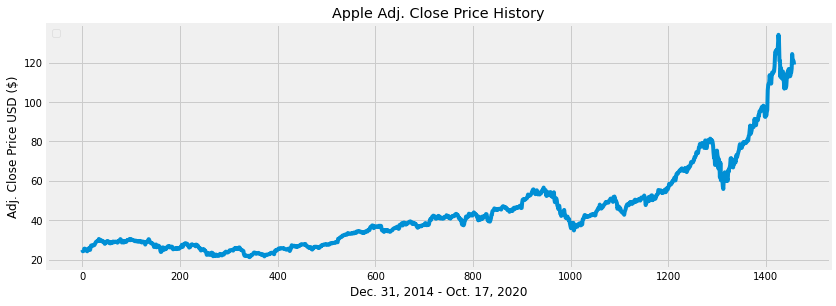

In [ ]:
#Visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close Price'])#, label = 'AAPL'
plt.title('Apple Adj. Close Price History')
plt.xlabel('Dec. 31, 2014 - Oct. 17, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()


In [ ]:
#Create simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['Adj Close Price'] = AAPL['Adj Close Price'].rolling(window= 30).mean()
SMA30

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1454,115.918666
1455,115.653999
1456,115.220999
1457,114.864666


In [ ]:
#Create moving 100 day average
SMA100 = pd.DataFrame()
SMA100['Adj Close Price'] = AAPL['Adj Close Price'].rolling(window=100).mean()
SMA100

,Adj Close Price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1454,102.840385
1455,103.260686
1456,103.676796
1457,104.093496


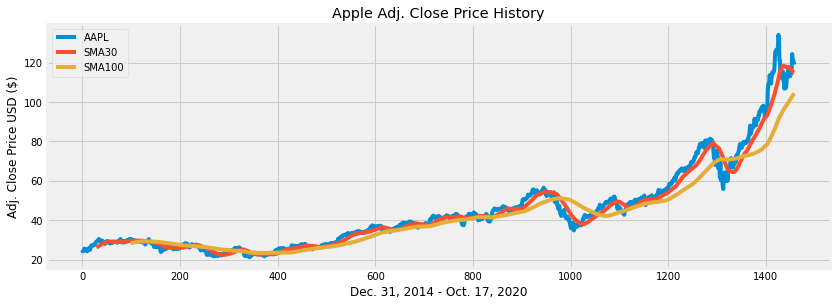

In [ ]:
#Visualize Data
plt.figure(figsize=(12.5, 4.5))
plt.plot(AAPL['Adj Close Price'], label = 'AAPL')
plt.plot(SMA30['Adj Close Price'], label = 'SMA30')
plt.plot(SMA100['Adj Close Price'], label = 'SMA100')
plt.title('Apple Adj. Close Price History')
plt.xlabel('Dec. 31, 2014 - Oct. 17, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Create a new dataframe to store all the data
data = pd.DataFrame()
data['AAPL'] = AAPL['Adj Close Price']
data['SMA30'] = SMA30['Adj Close Price']
data['SMA100'] = SMA100['Adj Close Price']
data

,AAPL,SMA30,SMA100
0,24.941502,NaN,NaN
1,24.238857,NaN,NaN
2,24.241146,NaN,NaN
3,24.581060,NaN,NaN
4,25.525522,NaN,NaN
...,...,...,...
1454,124.400002,115.918666,102.840385
1455,121.099998,115.653999,103.260686
1456,121.190002,115.220999,103.676796
1457,120.709999,114.864666,104.093496


In [ ]:
def buySell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(len(data)):
    if data ['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['AAPL'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(data['AAPL'][i])
        flag = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return(sigPriceBuy, sigPriceSell)


In [ ]:
buySell = buySell(data)
data['Buy Signal Price'] = buySell[0]
data['Sell Signal Price'] = buySell[1]
# To show the data
data

,AAPL,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,24.941502,NaN,NaN,NaN,NaN
1,24.238857,NaN,NaN,NaN,NaN
2,24.241146,NaN,NaN,NaN,NaN
3,24.581060,NaN,NaN,NaN,NaN
4,25.525522,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1454,124.400002,115.918666,102.840385,NaN,NaN
1455,121.099998,115.653999,103.260686,NaN,NaN
1456,121.190002,115.220999,103.676796,NaN,NaN
1457,120.709999,114.864666,104.093496,NaN,NaN


In [ ]:
#Show the data
data

,AAPL,SMA30,SMA100,Buy Signal Price,Sell Signal Price
0,24.941502,NaN,NaN,NaN,NaN
1,24.238857,NaN,NaN,NaN,NaN
2,24.241146,NaN,NaN,NaN,NaN
3,24.581060,NaN,NaN,NaN,NaN
4,25.525522,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1454,124.400002,115.918666,102.840385,NaN,NaN
1455,121.099998,115.653999,103.260686,NaN,NaN
1456,121.190002,115.220999,103.676796,NaN,NaN
1457,120.709999,114.864666,104.093496,NaN,NaN


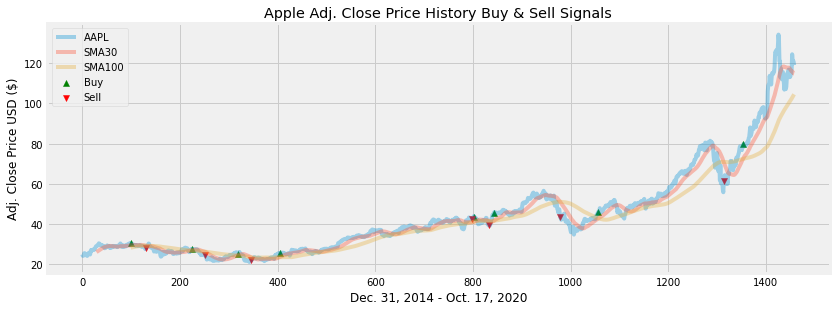

In [ ]:
#Visualize the data and the strategy to buy and sell the stock
plt.figure(figsize = (12.5, 4.6))
plt.plot(data['AAPL'], label = 'AAPL', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy Signal Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell Signal Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Apple Adj. Close Price History Buy & Sell Signals')
plt.xlabel('Dec. 31, 2014 - Oct. 17, 2020')
plt.ylabel('Adj. Close Price USD ($)')
plt.legend(loc = 'upper left')
plt.show()